In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("maltegrosse/8-m-spotify-tracks-genre-audio-features")

print("Path to dataset files:", path)

Path to dataset files: /Users/ilya/.cache/kagglehub/datasets/maltegrosse/8-m-spotify-tracks-genre-audio-features/versions/1


In [ ]:
import pandas as pd
import sqlite3

In [ ]:
db_path = path + "/spotify.sqlite"

In [ ]:
con = sqlite3.connect(db_path)
con.text_factory = lambda x: x.decode(encoding='utf-8',errors = 'ignore')
cur = con.cursor()

cur.execute("SELECT name FROM sqlite_master  WHERE type='table';")
print(cur.fetchall())

[('albums',), ('artists',), ('audio_features',), ('genres',), ('r_albums_artists',), ('r_albums_tracks',), ('r_artist_genre',), ('r_track_artist',), ('tracks',)]


In [ ]:
albums = pd.read_sql_query("SELECT * from albums", con)
albums.head()

{'id': {0: '2jKoVlU7VAmExKJ1Jh3w9P',
  1: '4JYUDRtPZuVNi7FAnbHyux',
  2: '6YjKAkDYmlasMqYw73iB0w',
  3: '2YlvHjDb4Tyxl4A1IcDhAe',
  4: '3UOuBNEin5peSRqdzvlnWM'},
 'name': {0: 'Alkaholik (feat. Erik Sermon, J Ro & Tash)',
  1: 'Flava in Ya Ear Remix (feat. Notorious B.I.G., L.L. Cool J, Busta Rhymes, Rampage)',
  2: 'Bitch Please II',
  3: "Just Dippin'",
  4: 'Still D.R.E.'},
 'album_group': {0: '', 1: '', 2: '', 3: '', 4: ''},
 'album_type': {0: 'album',
  1: 'single',
  2: 'album',
  3: 'compilation',
  4: 'album'},
 'release_date': {0: 954633600000,
  1: 757382400000,
  2: 959040000000,
  3: 1104537600000,
  4: 942710400000},
 'popularity': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}}

In [ ]:
artists = pd.read_sql_query("SELECT * from artists", con)
artists.head()

,name,id,popularity,followers
0,Xzibit,4tujQJicOnuZRLiBFdp3Ou,69,1193665
1,Erick Sermon,2VX0o9LDIVmKIgpnwdJpOJ,54,142007
2,J. Ro,3iBOsmwGzRKyR0vs2I61xP,45,158
3,Tash,22qf8cJRzBjIWb2Jc4JeOr,48,3421
4,Craig Mack,4akj4uteQQrrGxhX9Rjuyf,55,161966


In [ ]:
audio_features = pd.read_sql_query("SELECT * from audio_features", con)
audio_features.head()

,id,acousticness,analysis_url,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2jKoVlU7VAmExKJ1Jh3w9P,0.1800,https://api.spotify.com/v1/audio-analysis/2jKo...,0.893,219160,0.514,0.000000,11,0.0596,-5.080,1,0.283,95.848000,4,0.787
1,4JYUDRtPZuVNi7FAnbHyux,0.2720,https://api.spotify.com/v1/audio-analysis/4JYU...,0.520,302013,0.847,0.000000,9,0.3250,-5.300,1,0.427,177.371002,4,0.799
2,6YjKAkDYmlasMqYw73iB0w,0.0783,https://api.spotify.com/v1/audio-analysis/6YjK...,0.918,288200,0.586,0.000000,1,0.1450,-2.890,1,0.133,95.516998,4,0.779
3,2YlvHjDb4Tyxl4A1IcDhAe,0.5840,https://api.spotify.com/v1/audio-analysis/2Ylv...,0.877,243013,0.681,0.000000,1,0.1190,-6.277,0,0.259,94.834999,4,0.839
4,3UOuBNEin5peSRqdzvlnWM,0.1700,https://api.spotify.com/v1/audio-analysis/3UOu...,0.814,270667,0.781,0.000518,11,0.0520,-3.330,1,0.233,93.445000,4,0.536


In [ ]:
tracks = pd.read_sql_query("SELECT * from tracks", con)
tracks.head()

,id,disc_number,duration,explicit,audio_feature_id,name,preview_url,track_number,popularity,is_playable
0,1dizvxctg9dHEyaYTFufVi,1,275893,1,1dizvxctg9dHEyaYTFufVi,Gz And Hustlas (feat. Nancy Fletcher),,12,0,NaN
1,2g8HN35AnVGIk7B8yMucww,1,252746,1,2g8HN35AnVGIk7B8yMucww,Big Poppa - 2005 Remaster,https://p.scdn.co/mp3-preview/770e023eb0318270...,13,77,NaN
2,49pnyECzcMGCKAqxfTB4JZ,3,315080,0,49pnyECzcMGCKAqxfTB4JZ,"You Were Born - Early Version Of ""One Of The T...",,6,8,1.0
3,4E5IFAXCob6QqZaJMTw5YN,1,240800,1,4E5IFAXCob6QqZaJMTw5YN,Poppin' Them Thangs,https://p.scdn.co/mp3-preview/f3b556ced9657f89...,2,70,NaN
4,1gSt2UlC7mtRtJIc5zqKWn,2,203666,0,1gSt2UlC7mtRtJIc5zqKWn,"It's Hard To Say ""I Do"", When I Don't",,2,50,NaN


In [ ]:
r_albums_artists = pd.read_sql_query("SELECT * from r_albums_artists", con)
r_albums_artists.head()

,album_id,artist_id
0,6os2Mv58OYnQClPf7B9E1s,2HS2wQTJXpA65XWOKlAVxk
1,5XXN1tFQg7D7U1NSVh5fjf,3VBpsrUi2vV7Uj87ONHu7Z
2,63wFVCPZxdaFL9WKXbIQ5m,1kC8lmaSblf7GyK915496r
3,0z7p1tHVJ6s5wxAdj9iJ6e,2bTFaANevDESpT5eGWsZ7a
4,4afYJvrsp90d3V2COlLHVE,2maQMqxNnlRrBrS1oAsrX9


In [ ]:
genres = pd.read_sql_query("SELECT * FROM genres", con)
genres.head()

,id
0,detroit hip hop
1,g funk
2,gangster rap
3,hardcore hip hop
4,hip hop


In [ ]:
rAlbumsTracks = pd.read_sql_query("SELECT * FROM r_albums_tracks", con)
rAlbumsTracks.head()

,album_id,track_id
0,6os2Mv58OYnQClPf7B9E1s,3HnrHGLE9u2MjHtdobfWl9
1,6os2Mv58OYnQClPf7B9E1s,4lDjkpUrpWlMFofIpzuExK
2,6os2Mv58OYnQClPf7B9E1s,4RDT3ftT3V0IJVmW0TNgof
3,6os2Mv58OYnQClPf7B9E1s,1DfwOz5apF0w2d8hccSkhH
4,6os2Mv58OYnQClPf7B9E1s,46JY9OYPi4hJ7oLIS0FZt0


In [ ]:
rArtistGenre = pd.read_sql_query("SELECT * FROM r_artist_genre", con)
rArtistGenre.head()

,genre_id,artist_id
0,detroit hip hop,4tujQJicOnuZRLiBFdp3Ou
1,g funk,4tujQJicOnuZRLiBFdp3Ou
2,gangster rap,4tujQJicOnuZRLiBFdp3Ou
3,hardcore hip hop,4tujQJicOnuZRLiBFdp3Ou
4,hip hop,4tujQJicOnuZRLiBFdp3Ou


In [ ]:
rArtistGenre.head().to_dict()

{'genre_id': {0: 'detroit hip hop',
  1: 'g funk',
  2: 'gangster rap',
  3: 'hardcore hip hop',
  4: 'hip hop'},
 'artist_id': {0: '4tujQJicOnuZRLiBFdp3Ou',
  1: '4tujQJicOnuZRLiBFdp3Ou',
  2: '4tujQJicOnuZRLiBFdp3Ou',
  3: '4tujQJicOnuZRLiBFdp3Ou',
  4: '4tujQJicOnuZRLiBFdp3Ou'}}

In [ ]:
rTrackArtist = pd.read_sql_query("SELECT * FROM r_track_artist", con)
rTrackArtist

,track_id,artist_id
0,2jKoVlU7VAmExKJ1Jh3w9P,4tujQJicOnuZRLiBFdp3Ou
1,2jKoVlU7VAmExKJ1Jh3w9P,2VX0o9LDIVmKIgpnwdJpOJ
2,2jKoVlU7VAmExKJ1Jh3w9P,3iBOsmwGzRKyR0vs2I61xP
3,2jKoVlU7VAmExKJ1Jh3w9P,22qf8cJRzBjIWb2Jc4JeOr
4,4JYUDRtPZuVNi7FAnbHyux,4akj4uteQQrrGxhX9Rjuyf
...,...,...
11840397,6ClotRUApTN25L3OnkzQjb,3y9hQYlwNKqhdybIJTFzTr
11840398,7mZL8mtlavFzAzIlIfOMv2,5e8vdggiGg9glSpuBgcaiv
11840399,7mZL8mtlavFzAzIlIfOMv2,6NgwMiz1Dwsktnn8p8yujE
11840400,08ITn8qaxbnEyk3N08IC47,4NEA8zkFgdVHYWZXANEHA7


Но остальное это уже отношения

In [ ]:
albums = albums.sort_values(by='popularity',ascending=False)

In [ ]:
albums_merge_artists = pd.merge(rAlbumsArtists,albums,left_on='album_id',right_on='id')
albums_merge_artists.drop(['id'],axis=1,inplace=True)
albums_merge_artists.sort_values(by='popularity',ascending=False,inplace=True)
albums_merge_artists.rename(columns={'name':'albumName'},inplace=True)
albums_merge_artists.drop_duplicates(subset=['albumName','artist_id'],inplace=True)

In [ ]:
MergedData = pd.merge(rAlbumsTracks,albums_merge_artists[albums_merge_artists['album_type']!='single'])
MergedData = pd.merge(MergedData,audio_features,left_on='track_id',right_on='id')
MergedData = MergedData.drop(['id'],axis=1)
MergedData = pd.merge(MergedData,artists[['name','id']],left_on='artist_id',right_on='id')
MergedData = MergedData.drop(['id'],axis=1)
MergedData = MergedData.rename(columns={'name':'artistName'})
MergedData = MergedData.sort_values(by=['popularity'],ascending=False)

In [ ]:
MergedData.iloc[0].T

album_id                                       5dGWwsZ9iB2Xc3UKR0gif2
track_id                                       6I3mqTwhRpn34SLVafSH7G
artist_id                                      1uNFoZAHBGtllmzznpCI3s
albumName                                                     Justice
album_group                                                          
album_type                                                      album
release_date                                            1616112000000
popularity                                                        100
acousticness                                                    0.185
analysis_url        https://api.spotify.com/v1/audio-analysis/6I3m...
danceability                                                    0.601
duration                                                       153190
energy                                                          0.741
instrumentalness                                             0.000029
key                 

In [ ]:
import pickle

In [ ]:
def storeData(df):
    dbfile = open('MergedData','ab')
    pickle.dump(df, dbfile)
    dbfile.close()

storeData(MergedData)

In [ ]:
def loadData():
    # for reading also binary mode is important
    dbfile = open('MergedData', 'rb')
    db = pickle.load(dbfile)
    dbfile.close()
    return db

MergedData = loadData()

EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
MergedData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9183746 entries, 2103779 to 9183745
Data columns (total 23 columns):
 #   Column            Dtype  
---  ------            -----  
 0   album_id          object 
 1   track_id          object 
 2   artist_id         object 
 3   albumName         object 
 4   album_group       object 
 5   album_type        object 
 6   release_date      int64  
 7   popularity        int64  
 8   acousticness      float64
 9   analysis_url      object 
 10  danceability      float64
 11  duration          int64  
 12  energy            float64
 13  instrumentalness  float64
 14  key               int64  
 15  liveness          float64
 16  loudness          float64
 17  mode              int64  
 18  speechiness       float64
 19  tempo             float64
 20  time_signature    int64  
 21  valence           float64
 22  artistName        object 
dtypes: float64(9), int64(6), object(8)
memory usage: 1.6+ GB


Для начала нужно решить, что мы делаем с отрицательными значениями времени. Для этого перейдем по ссылкам и посмотрим оригинальную дату, а затем постараемся проследить, как именно она конвертировалась.

<Axes: >

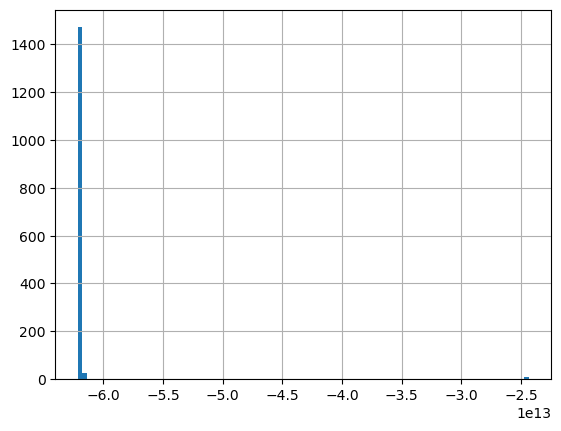

In [ ]:
MergedData['release_date'][MergedData['release_date'] < -3000000000000].hist(bins=100)

In [ ]:
MergedData[MergedData['release_date']< -3000000000000].sort_values('release_date').head()

,album_id,track_id,artist_id,albumName,album_group,album_type,release_date,popularity,acousticness,analysis_url,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artistName
7316778,5ZR3wCUhSc0Bbb6V4dRGfT,37vBqIEsoZjRyhOkolH65g,5RiBm9eRvtBsrxCGre3f6G,芸能生活40周年企画 シングルパーフェクトコレクション(4枚組),,album,-62135769600000,43,0.514,https://api.spotify.com/v1/audio-analysis/37vB...,...,0.000013,11,0.0727,-6.719000,0,0.0279,89.031998,4,0.5330,Ikuzo Yoshi
6564119,5Xb7o38gPfdPNt29aZdA82,2250cifDIExTFkjEGnCKPY,07YQv91KmqzQSg5iNINFl0,"2016 American Choral Directors Association, We...",,album,-62135769600000,1,0.957,https://api.spotify.com/v1/audio-analysis/2250...,...,0.199000,8,0.6880,-16.927000,0,0.5210,111.962997,4,0.0669,Northern Arizona University Shrine of the Ages...
6564129,5Xb7o38gPfdPNt29aZdA82,4rqOoqAZ9nshwMxy483VQk,1UGkyn1ev2gK0MQzXL09HG,"2016 American Choral Directors Association, We...",,album,-62135769600000,1,0.967,https://api.spotify.com/v1/audio-analysis/4rqO...,...,0.830000,1,0.6870,-29.896000,1,0.0423,85.787003,4,0.0388,María Guinand
6564118,5Xb7o38gPfdPNt29aZdA82,0mcWoaTGE2DRzD4zqvfvwA,07YQv91KmqzQSg5iNINFl0,"2016 American Choral Directors Association, We...",,album,-62135769600000,1,0.973,https://api.spotify.com/v1/audio-analysis/0mcW...,...,0.012100,2,0.0925,-21.862000,1,0.0492,117.654999,5,0.0414,Northern Arizona University Shrine of the Ages...
6564116,5Xb7o38gPfdPNt29aZdA82,5hTlERsN6jmTjtJEYgRxP1,07YQv91KmqzQSg5iNINFl0,"2016 American Choral Directors Association, We...",,album,-62135769600000,1,0.984,https://api.spotify.com/v1/audio-analysis/5hTl...,...,0.652000,2,0.6600,-19.516001,1,0.0354,101.983002,3,0.0404,Northern Arizona University Shrine of the Ages...


In [ ]:
f"{np.round(MergedData[MergedData['release_date'] < -3000000000000].shape[0] / MergedData.shape[0] * 100, 2)}% от нашего датасета"

'0.02% от нашего датасета'

Перейдя по ссылкам на сам Spotify, заметим, что дата выпуска либо вызывает сомнения (некоторые артисты датировали так самостоятельно, хотя другие песни их деятельности датированы современными годами), либо закралась ошибка в самом датасете, ибо дата не совпадает с карточкой трека. Оба этих случая выкинем из рассмотрения, так как они занимают всего 0.02% всех данных.

In [ ]:
MergedData = MergedData[MergedData['release_date'] > -3000000000000]

Описание числовых признаков, например, длительности, танцевальности, энергии и других характеристик треков.

In [ ]:
MergedData.describe()

,release_date,popularity,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06,9.182239e+06
mean,1.185575e+12,1.473742e+01,4.886274e-01,5.073789e-01,2.366752e+05,4.967904e-01,2.748096e-01,5.211523e+00,2.068226e-01,-1.208342e+01,6.687188e-01,9.456219e-02,1.166767e+02,3.812978e+00,4.588381e-01
std,4.067463e+11,1.592226e+01,3.879346e-01,1.974687e-01,1.617849e+05,2.950138e-01,3.773755e-01,3.527976e+00,1.824601e-01,7.055413e+00,4.706740e-01,1.420181e-01,3.157346e+01,6.109557e-01,2.861478e-01
min,-2.587680e+12,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.086048e+12,1.000000e+00,6.410000e-02,3.620000e-01,1.636770e+05,2.340000e-01,1.740000e-06,2.000000e+00,9.670000e-02,-1.592700e+01,0.000000e+00,3.630000e-02,9.290500e+01,4.000000e+00,2.040000e-01
50%,1.304381e+12,1.000000e+01,4.910000e-01,5.200000e-01,2.134990e+05,5.030000e-01,3.380000e-03,5.000000e+00,1.300000e-01,-1.015800e+01,1.000000e+00,4.640000e-02,1.159330e+02,4.000000e+00,4.440000e-01
75%,1.435018e+12,2.400000e+01,9.030000e-01,6.600000e-01,2.742130e+05,7.530000e-01,7.080000e-01,8.000000e+00,2.610000e-01,-6.801000e+00,1.000000e+00,7.790000e-02,1.360070e+02,4.000000e+00,6.990000e-01
max,1.619136e+12,1.000000e+02,9.960000e-01,1.000000e+00,6.072187e+06,1.000000e+00,1.000000e+00,1.100000e+01,1.000000e+00,6.275000e+00,1.000000e+00,9.740000e-01,2.499870e+02,5.000000e+00,1.000000e+00


In [ ]:
MergedData.columns

Index(['album_id', 'track_id', 'artist_id', 'albumName', 'album_group',
       'album_type', 'release_date', 'popularity', 'acousticness',
       'analysis_url', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artistName'],
      dtype='object')

Рассмотрим распределение релизов по годам

In [ ]:
unique_tracks_index = MergedData['track_id'][~MergedData['track_id'].duplicated()].index

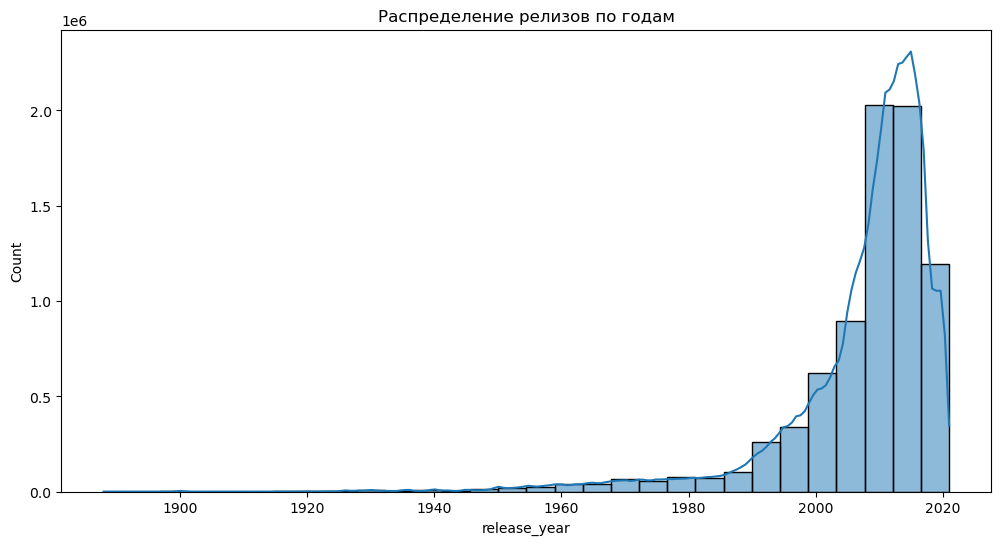

In [ ]:
MergedData['release_year'] = pd.to_datetime(MergedData['release_date'], unit='ms').dt.year
plt.figure(figsize=(12, 6))
sns.histplot(MergedData.loc[unique_tracks_index]['release_year'], bins=30, kde=True)
plt.title("Распределение релизов по годам")
plt.show()

Заметим, что больше всего релизов было выпущено в 2010-ые года. При учете популярности треков в дальнейшем, вероятно, будет необходимо нормализовавыть прослушиваемость треков на выпуск.

Популярность треков в зависимости от года выпуска.

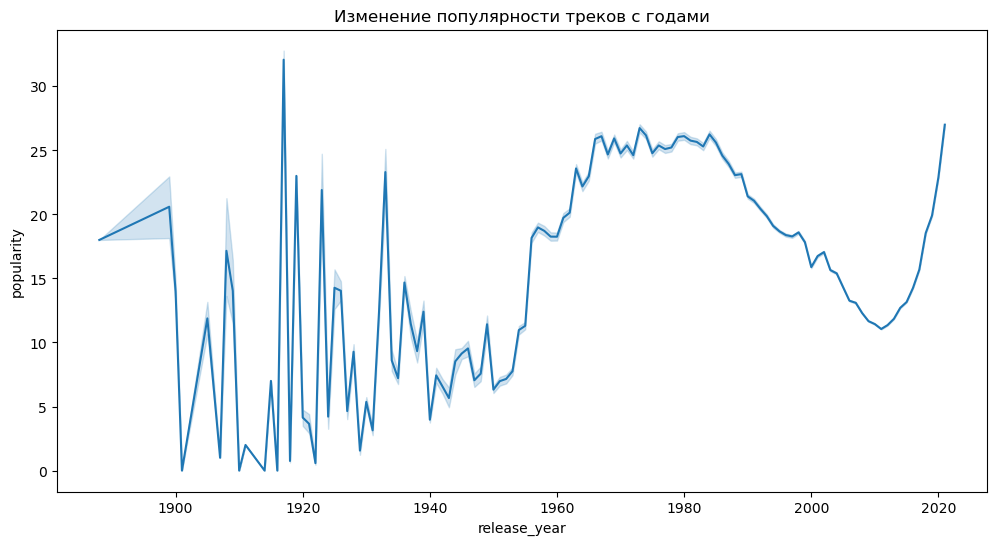

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=MergedData.loc[unique_tracks_index], x='release_year', y='popularity')
plt.title("Изменение популярности треков с годами")
plt.show()

Особенной корреляции по годам не наблюдается, разве что прослеживается тренд сглаженности со временем. Здесь же подтверждаем сказанное выше: лимит прослушиваний у пользователей ограничен, а треков больше, поэтому тяжелее сконцентрировать стримы на чем-то одном.

Продемонстрируем анализ музыкальных характеристик треков.

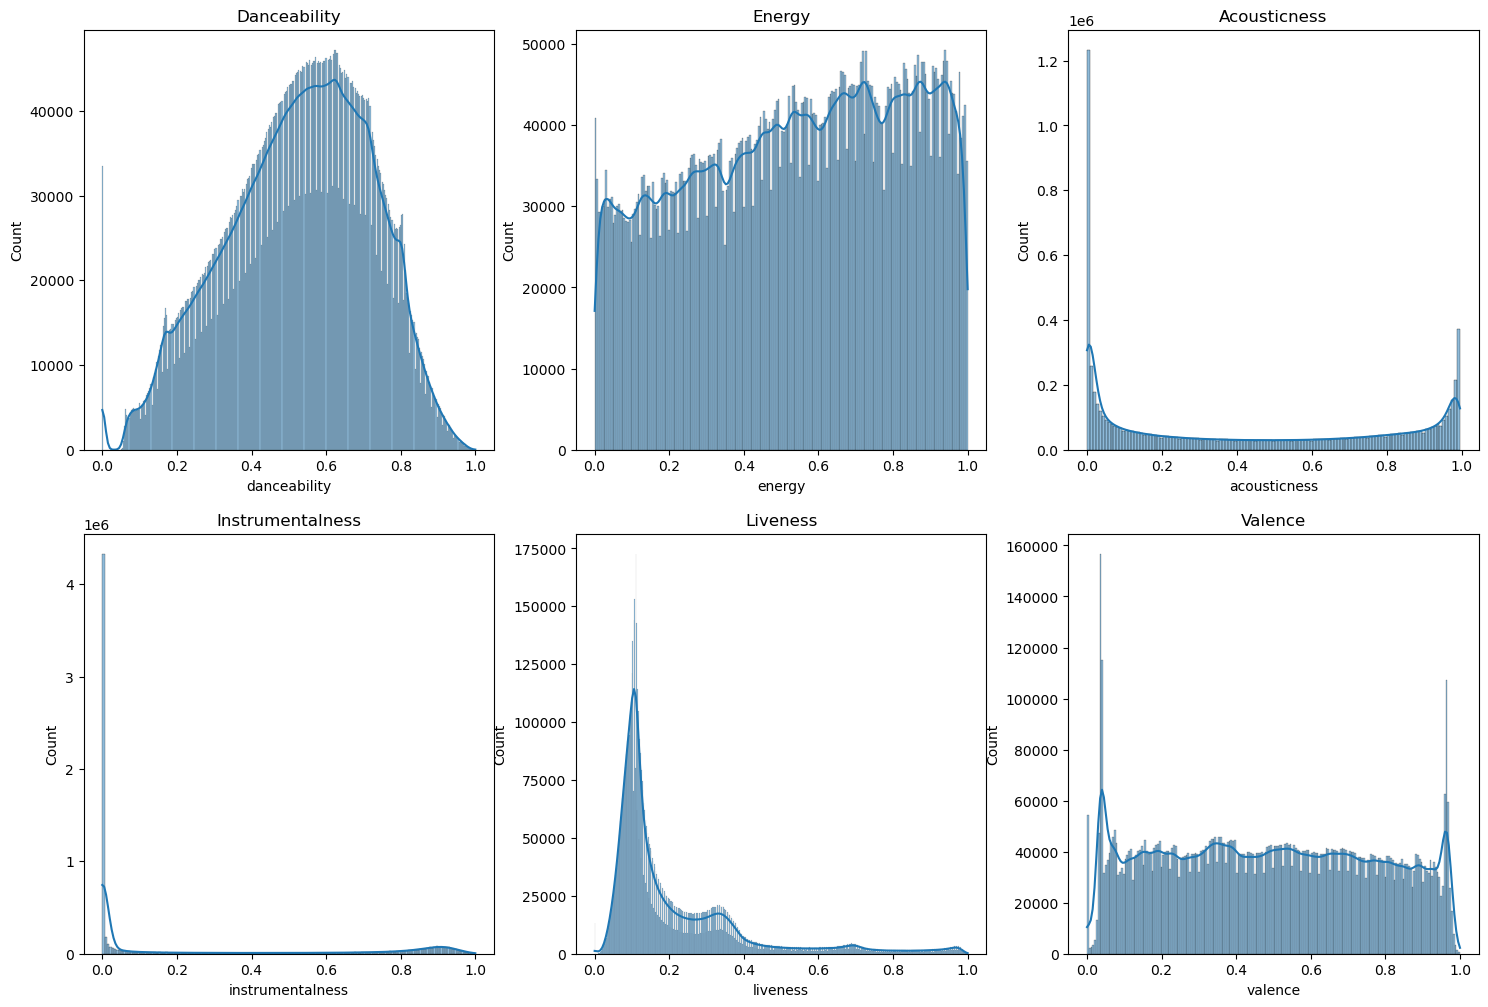

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
sns.histplot(MergedData.loc[unique_tracks_index]['danceability'], ax=axes[0, 0], kde=True)
sns.histplot(MergedData.loc[unique_tracks_index]['energy'], ax=axes[0, 1], kde=True)
sns.histplot(MergedData.loc[unique_tracks_index]['acousticness'], ax=axes[0, 2], kde=True)
sns.histplot(MergedData.loc[unique_tracks_index]['instrumentalness'], ax=axes[1, 0], kde=True)
sns.histplot(MergedData.loc[unique_tracks_index]['liveness'], ax=axes[1, 1], kde=True)
sns.histplot(MergedData.loc[unique_tracks_index]['valence'], ax=axes[1, 2], kde=True)
axes[0, 0].set_title("Danceability")
axes[0, 1].set_title("Energy")
axes[0, 2].set_title("Acousticness")
axes[1, 0].set_title("Instrumentalness")
axes[1, 1].set_title("Liveness")
axes[1, 2].set_title("Valence")
plt.show()

При рекомендации треков можно учитывать характеристики самих песен - например, танцевальность песни визуально следует нормальному распределению, а значит, чтобы попасть в ядро аудитории вечеринки, нужно брать песни со средними значениями, повышая вероятность зацепить их любимую песню.

Рассмотрим популярность таких категориальный признаков, как жанры.

In [ ]:
merged_generes_data = pd.merge(MergedData, rArtistGenre, on="artist_id", how="left")

/var/folders/sf/jzrphqn915d65zmft1kp0qv40000gp/T/ipykernel_26889/3877390782.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")


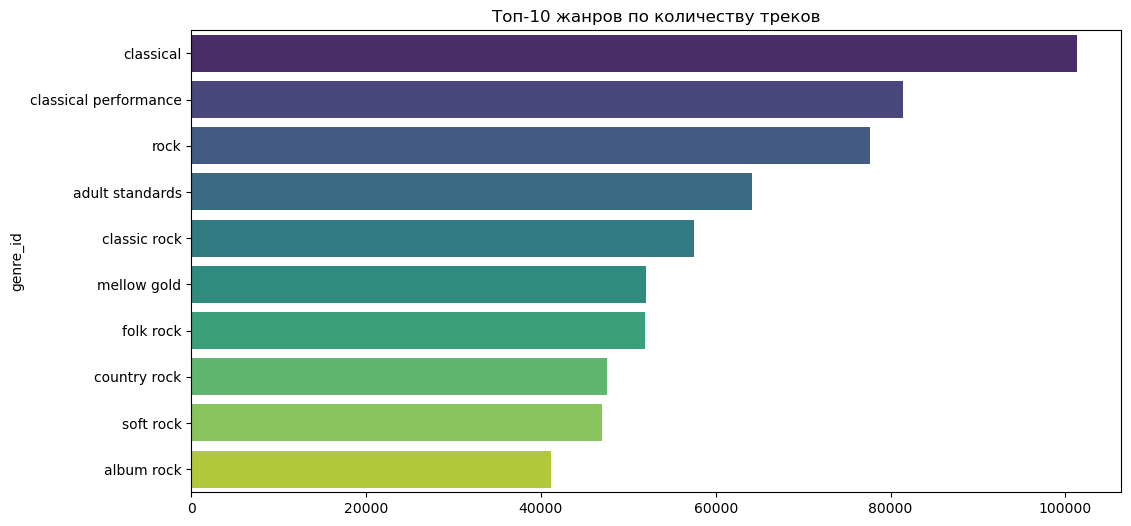

In [ ]:
top_genres = merged_generes_data.loc[unique_tracks_index]['genre_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="viridis")
plt.title("Топ-10 жанров по количеству треков")
plt.show()

Так, мы значем, что наиболее распространенные жанры для публикаций - это классика и рок, теперь посмотрим на взаимосвязь жанра и популярности треков

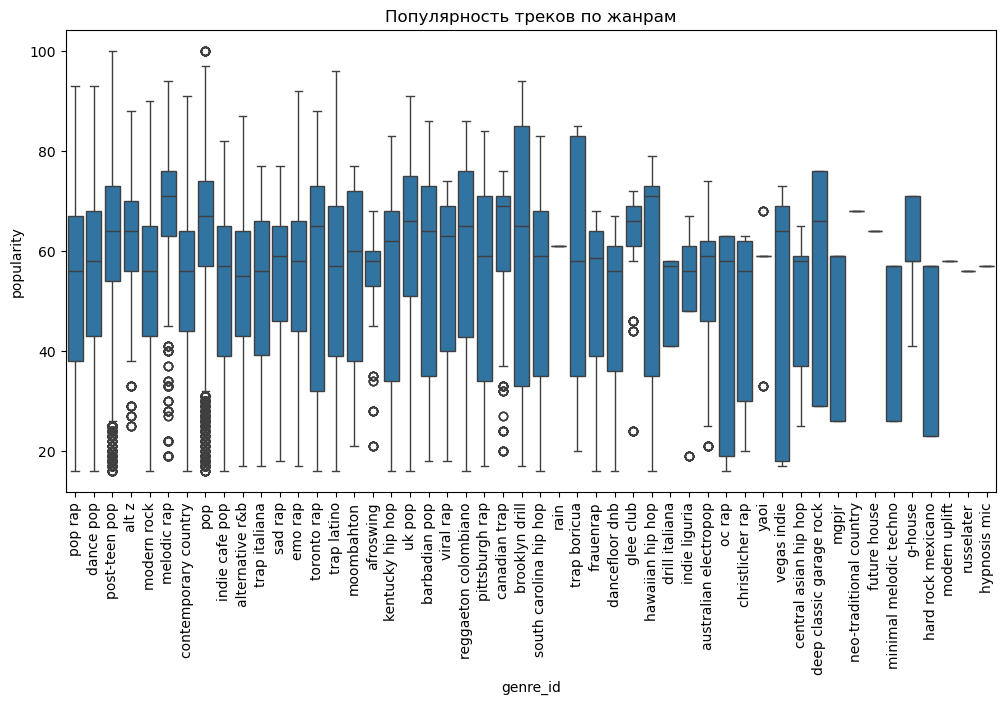

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_generes_data.loc[unique_tracks_index]
            [merged_generes_data.loc[unique_tracks_index]['genre_id']
                                     .isin(merged_generes_data.loc[unique_tracks_index]
                                           .groupby('genre_id')['popularity'].median()
                                           .sort_values()
                                           .tail(50)
                                           .index
                                                        )]
, x='genre_id', y='popularity')
plt.xticks(rotation=90)
plt.title("Популярность треков по жанрам")
plt.show()

Как и ожидалось, наиболее популярные жанры - это разновидности попа. При рекомендации трека приоритетнее использовать наиболее популярные по жанрам при прочих равных.

Корреляционный анализ характеристик треков

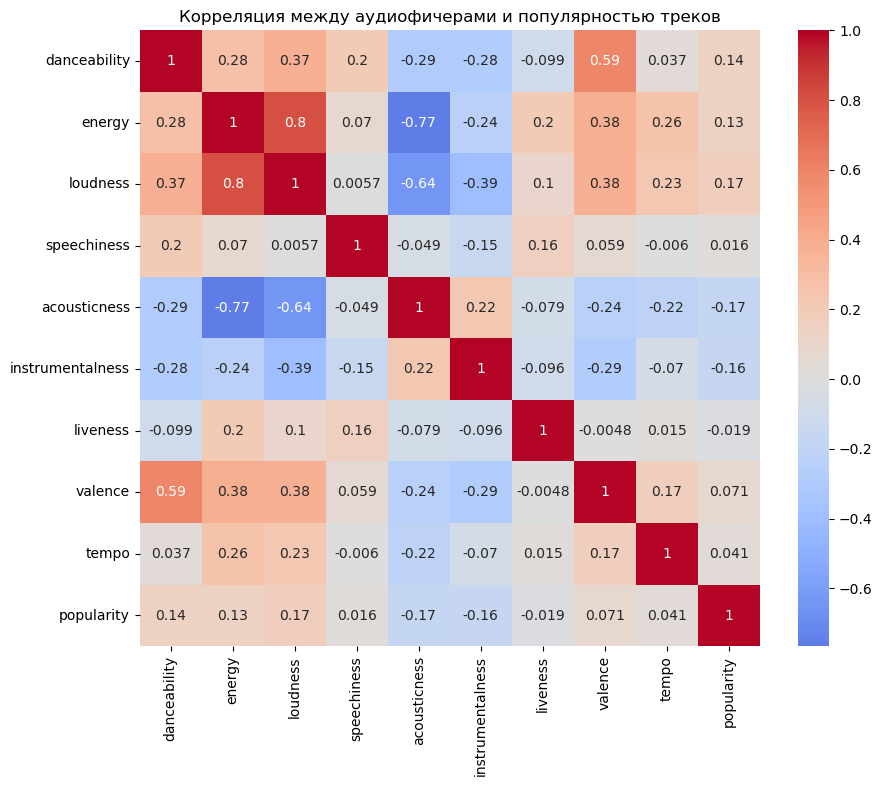

In [ ]:
corr = merged_generes_data.loc[unique_tracks_index][['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                  'instrumentalness', 'liveness', 'valence', 'tempo', 'popularity']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Корреляция между аудиофичерами и популярностью треков")
plt.show()

В данной матрице корреляций музыкальных характеристик треков можно заметить ряд значимых взаимосвязей. Сильная положительная корреляция между энергией и громкостью (`0.80`) указывает на то, что энергичные треки, как правило, играются на более высокой громкости. Валентность, которая отражает эмоциональную окраску музыки, довольно сильно коррелирует с танцевальностью (`0.59`), что подразумевает, что более жизнерадостные треки обычно более танцевальны. Также существует умеренная отрицательная корреляция между акустичностью и громкостью (`-0.64`), что естественно, так как акустические треки обычно записываются на более низких уровнях громкости. Интересно, что акустичность и инструментальность также слегка положительно коррелируют (`0.22`), вероятно, отражая тенденцию инструментальных треков быть менее обработанными и более "чистыми" с акустической точки зрения. Отрицательная корреляция между танцевальностью и акустичностью (`-0.29`) также подтверждает, что более акустические треки реже обладают ярко выраженными ритмами, необходимыми для танцев. Наконец, популярность треков имеет лишь слабые положительные связи с большинством характеристик, например, с громкостью и энергией, что, возможно, свидетельствует о разнообразии вкусов аудитории, ориентированной на популярные треки, и отсутствии предпочтения к конкретным музыкальным параметрам. Многие выводы по данной матрице подтверждаются замечаниями выше и ниже.

Анализ продолжительности треков

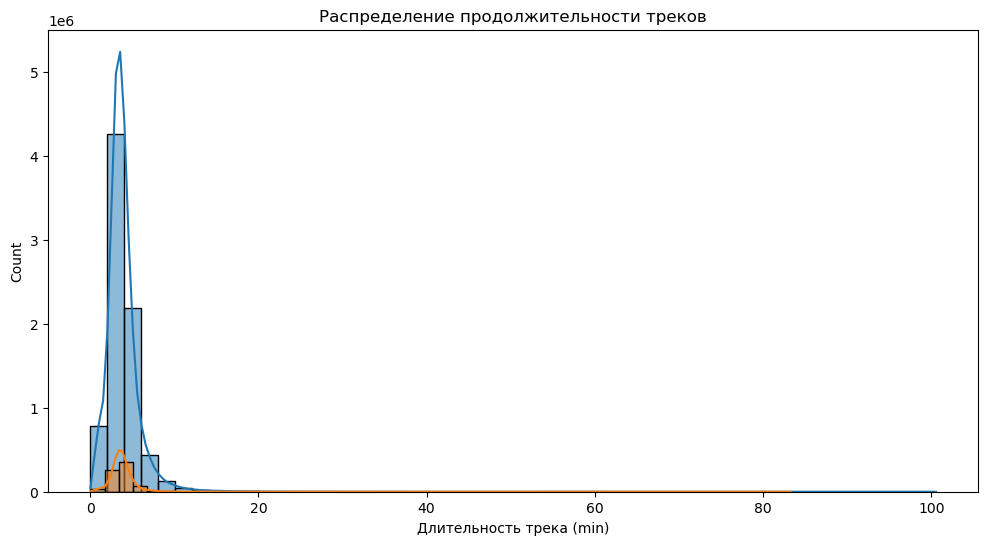

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot((merged_generes_data.loc[unique_tracks_index]['duration'] * 0.001 / 60), bins=50, kde=True)
sns.histplot((merged_generes_data.loc[unique_tracks_index][
    merged_generes_data.loc[
        unique_tracks_index
    ]['popularity'] > merged_generes_data.loc[
        unique_tracks_index
    ]['popularity'].quantile(.9)
]['duration'] * 0.001 / 60), bins=50, kde=True)
plt.title("Распределение продолжительности треков")
plt.xlabel("Длительность трека (min)")
plt.show()

Пики длительности топа-10% популярных песен и всех песен примерно совпадают, однако первые более кучные вокруг медианы.

Взаимосвязь громкости и энергии

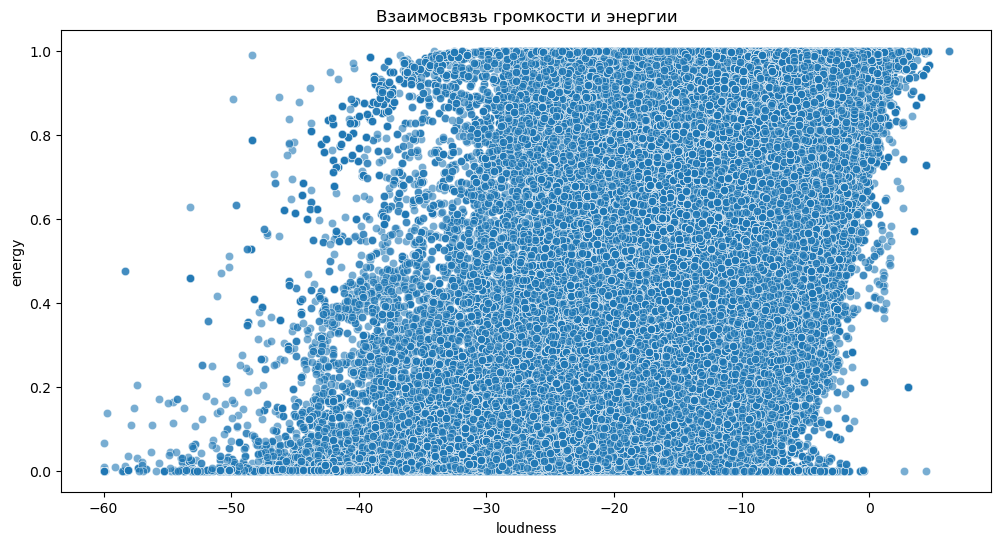

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_generes_data.loc[unique_tracks_index], x='loudness', y='energy', alpha=0.6)
plt.title("Взаимосвязь громкости и энергии")
plt.show()

Как и ожидалось - песни громче более энергичные, стоит учесть при формировании плейлиста для веселой компании.

Взаимосвязь танцевальности и популярности

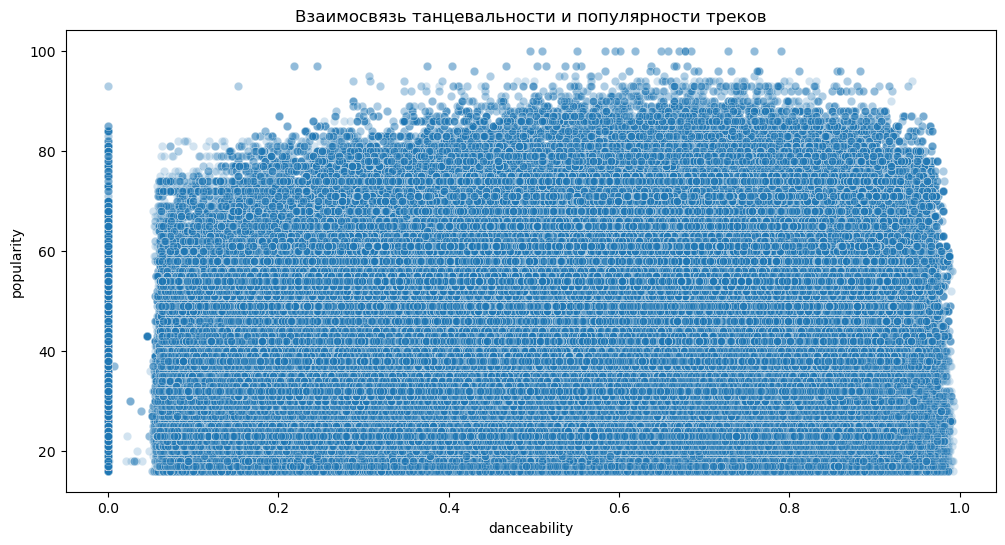

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_generes_data.loc[unique_tracks_index], x='danceability', y='popularity', alpha=0.2)
plt.title("Взаимосвязь танцевальности и популярности треков")
plt.show()

Популярные песни склонны быть более динамичными.

Для анализа "плодовитости" артиста по популярности можно использовать показатель, отражающий, какой процент его треков имеют популярность топ-5%. Этот метод позволит сравнивать артистов не только по числу их треков, но и по их относительной популярности. При этом возьмем артистов с количеством треков больше среднего, чтобы повысить их узнаваемость.

/var/folders/sf/jzrphqn915d65zmft1kp0qv40000gp/T/ipykernel_26889/2992342856.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_popularity.popularity_ratio, y=artist_popularity.index, palette="magma")


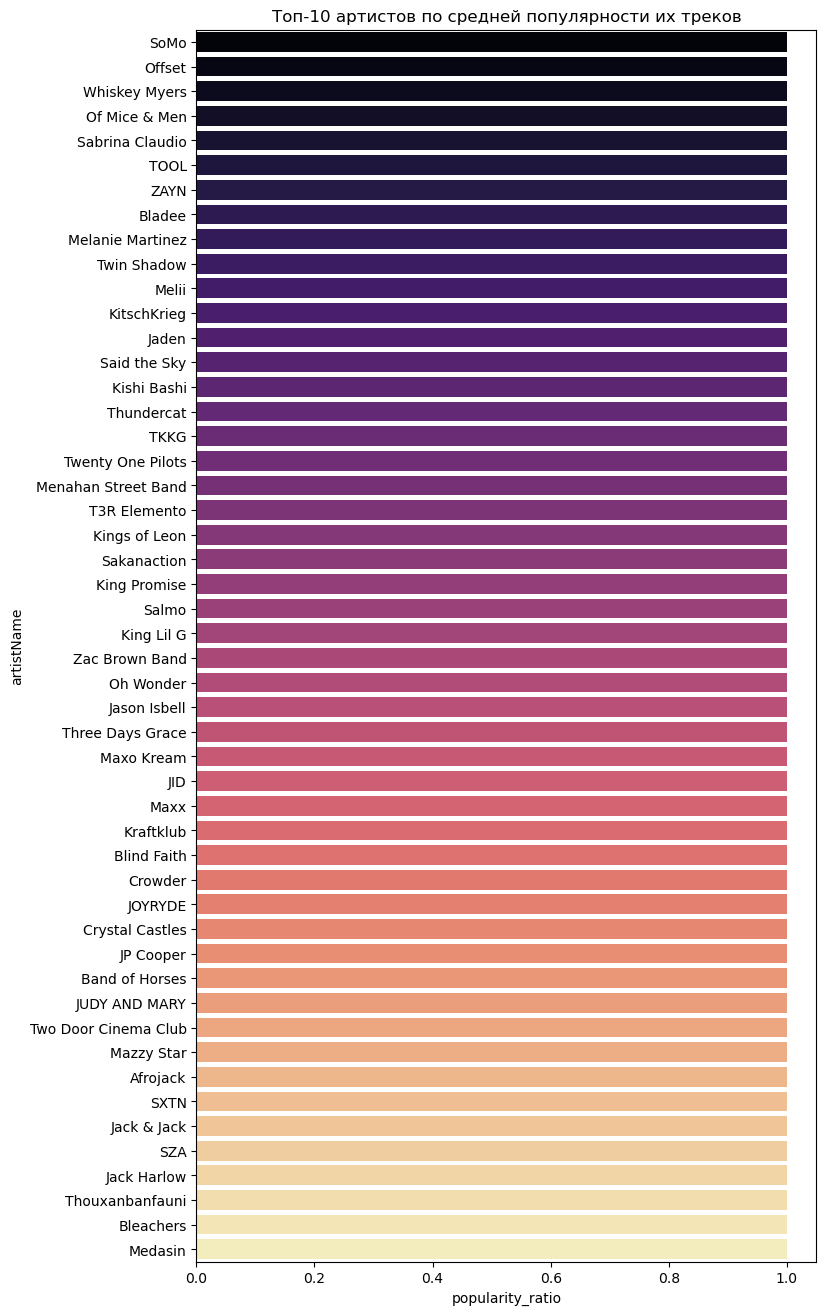

In [ ]:
average_popularity = merged_generes_data['popularity'].quantile(.95)

merged_generes_data['is_popular'] = merged_generes_data['popularity'] > average_popularity
artist_popularity = merged_generes_data.groupby('artistName').agg(
    total_tracks=('track_id', 'size'),
    popular_tracks=('is_popular', 'sum')
)
artist_popularity = artist_popularity[artist_popularity['total_tracks'] > artist_popularity['total_tracks'].mean()]
artist_popularity['popularity_ratio'] = artist_popularity['popular_tracks'] / artist_popularity['total_tracks']
artist_popularity = artist_popularity.sort_values(by='popularity_ratio', ascending=False)

artist_popularity = artist_popularity[['total_tracks', 'popular_tracks', 'popularity_ratio']].head(50)
plt.figure(figsize=(8, 16))
sns.barplot(x=artist_popularity.popularity_ratio, y=artist_popularity.index, palette="magma")
plt.title("Топ-10 артистов по средней популярности их треков")
plt.show()

Можно использовать среднюю популярность треков каждого артиста как метрику, оценивая, насколько популярны их произведения в целом. Это обеспечит большее внимание к артистам, чьи треки имеют высокую совокупную популярность, даже если у них меньше общего количества популярных треков.

/var/folders/sf/jzrphqn915d65zmft1kp0qv40000gp/T/ipykernel_26889/1399311237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")


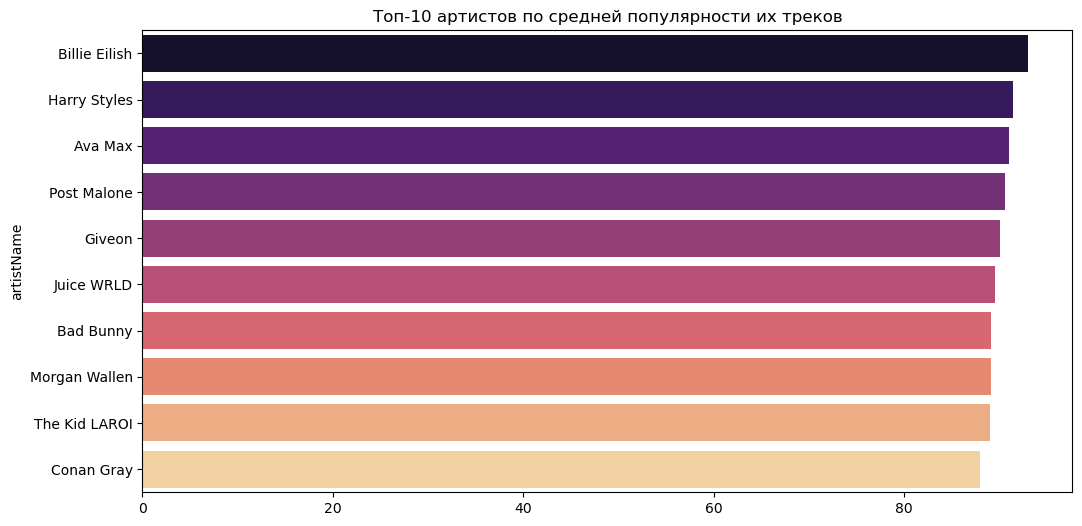

In [ ]:
top_artists = merged_generes_data.groupby('artistName')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette="magma")
plt.title("Топ-10 артистов по средней популярности их треков")
plt.show()